In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
#to convert date stamp
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    #print(city)
# Print the city count to confirm sufficient count
len(cities)
#print(cities)

614

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# set up lists to hold reponse info
lat = []
lon=[]
temp = []
humidity=[]
wind_speed=[]
cloudiness=[]
country=[]
place=[]
date_weather=[]

print('Beginning Data Retrieval')     
print('-----------------------------')
count=0
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        count=count+1
        print('Processing Record {} | {}'.format(count,city))
        response = requests.get(query_url + city).json()
        #print(json.dumps(response, indent=4, sort_keys=True))
        #print(response['coord']['lat'])
        #print(response['main']['temp'])
        #break
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        place.append(response['name'])
        date_weather.append(response['dt'])
        country.append(response['sys']['country'])
        #print(json.dumps(response, indent=4, sort_keys=True))
    except KeyError:
        print('Skipping {}'.format(city))
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")
#print(lat)
print(len(lat))
print(len(lon))
print(len(temp))
print(len(humidity))
print(len(wind_speed))
print(len(cloudiness))
print(len(place))
print(len(date_weather))
print(len(country))


Beginning Data Retrieval
-----------------------------
Processing Record 1 | saskylakh
Processing Record 2 | vaini
Processing Record 3 | belushya guba
Skipping belushya guba
Processing Record 4 | wangqing
Processing Record 5 | punta arenas
Processing Record 6 | bonwapitse
Processing Record 7 | cap-aux-meules
Processing Record 8 | illoqqortoormiut
Skipping illoqqortoormiut
Processing Record 9 | tazovskiy
Processing Record 10 | sataua
Skipping sataua
Processing Record 11 | qaanaaq
Processing Record 12 | busselton
Processing Record 13 | santa maria
Processing Record 14 | ushuaia
Processing Record 15 | katsuura
Processing Record 16 | riyadh
Processing Record 17 | lasa
Processing Record 18 | yellowknife
Processing Record 19 | waipawa
Processing Record 20 | torbay
Processing Record 21 | stornoway
Skipping stornoway
Processing Record 22 | bengkulu
Skipping bengkulu
Processing Record 23 | stykkisholmur
Processing Record 24 | kysyl-syr
Processing Record 25 | hasaki
Processing Record 26 | bantry

In [5]:
weather_dict = {
    'city': place,
    'lat': lat,
    'lon': lon,
    'temp': temp,
    'humidity':humidity,
    'cloudiness':cloudiness,
    'wind_speed':wind_speed,
    'country':country
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lon,temp,humidity,cloudiness,wind_speed,country
0,Saskylakh,71.97,114.09,-12.27,98,94,0.851,RU
1,Vaini,15.34,74.49,22.73,86,100,2.671,IN
2,Wangqing,43.31,129.76,-0.67,56,45,2.013,CN
3,Punta Arenas,-53.16,-70.91,8.63,70,0,3.600,CL
4,Bonwapitse,-23.08,26.70,24.73,32,18,3.787,BW


In [6]:
weather_data.to_csv(output_data_file, index=False)

In [7]:
timestamp = date_weather[0]
dt_object = datetime.fromtimestamp(timestamp)
#print(dt_object)
#print(dt_object.split())

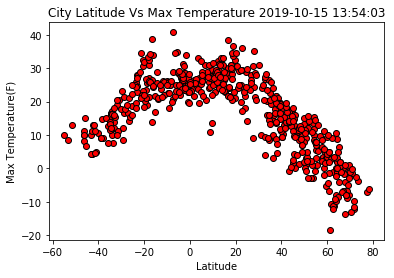

In [12]:
plt.scatter(lat, temp, marker='o', facecolors='red', edgecolors='black')
plt.title('City Latitude Vs Max Temperature {}'.format(dt_object))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.savefig('temp.png')

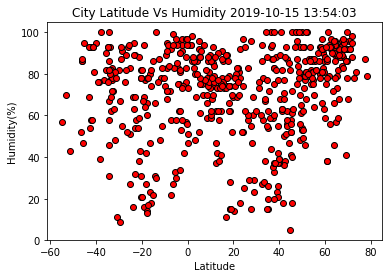

In [13]:
plt.scatter(lat,humidity, marker='o', facecolors='red', edgecolors='black')
plt.title('City Latitude Vs Humidity {}'.format(dt_object))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.savefig('humidity.png')

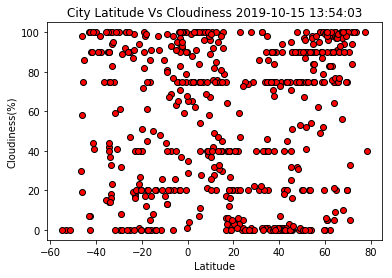

In [14]:
plt.scatter(lat,cloudiness, marker='o', facecolors='red', edgecolors='black')
plt.title('City Latitude Vs Cloudiness {}'.format(dt_object))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig('cloudiness.png')

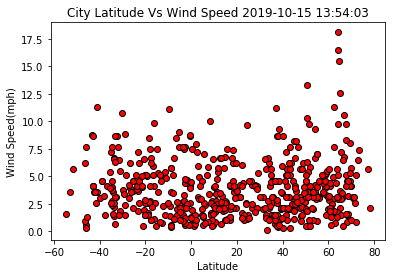

In [15]:
plt.scatter(lat,wind_speed, marker='o', facecolors='red', edgecolors='black')
plt.title('City Latitude Vs Wind Speed {}'.format(dt_object))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig('wind_speed.png')

In [ ]:
#Observations
#1. Temperatures are higher around the equator
#2. Humidity is more in the south compared to north
#3. Temperatures dips more in the south than north
#4. Wind speed ranges from 0 to 8 mph north to south, and drops towards the poles
